<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_4_Exploring_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploremos la volumetria de nuestros datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [ ]:
df=pd.read_csv("Universo.csv")
df.head()

,idsolicitud,CODMES_VENTA,Producto,plazo,mtodeuda
0,1,201806,Consumo,36.0,7630.713024
1,2,201807,Consumo,48.0,24859.205440
2,3,201803,Consumo,12.0,8625.146855
3,4,201807,Consumo,48.0,26729.968830
4,5,201805,Consumo,24.0,5748.332323


<Axes: xlabel='Producto', ylabel='count'>

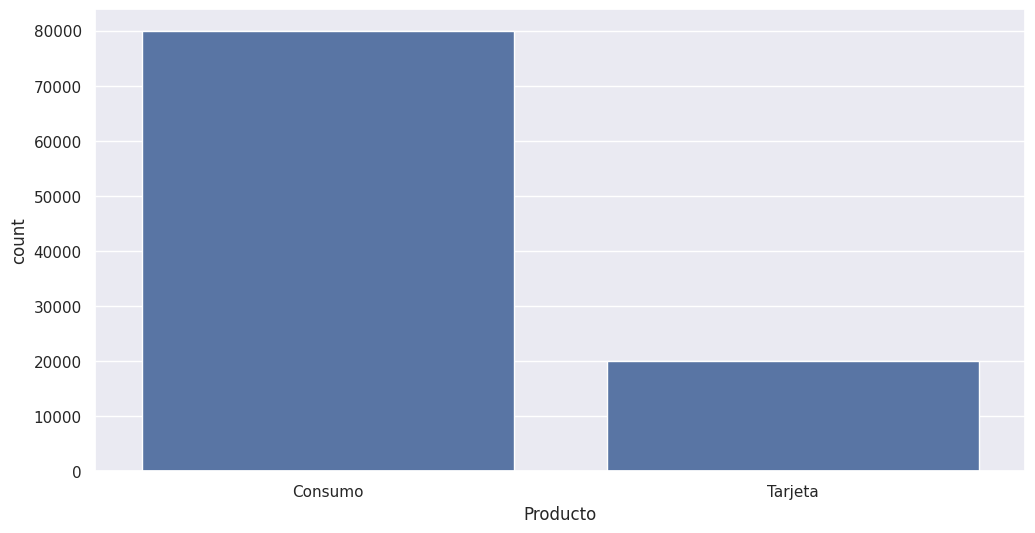

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = "Producto")
#df['Producto'].value_counts().sort_index

In [ ]:
df.shape

(100000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   idsolicitud   100000 non-null  int64  
 1   CODMES_VENTA  100000 non-null  int64  
 2   Producto      100000 non-null  object 
 3   plazo         79901 non-null   float64
 4   mtodeuda      100000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ MB


In [ ]:
a=df.pivot_table(values="idsolicitud", index="CODMES_VENTA", columns="Producto", aggfunc="count", margins=True, margins_name="Total", sort=True)
a

Producto,Consumo,Tarjeta,Total
CODMES_VENTA,,,
201801,6443,1621,8064
201802,5629,1404,7033
201803,6548,1612,8160
201804,7220,1812,9032
201805,6553,1642,8195
201806,9443,2474,11917
201807,4793,1156,5949
201808,3112,753,3865
201809,2458,639,3097


In [ ]:
a1=df.pivot_table(values="idsolicitud", index="CODMES_VENTA", columns="Producto", aggfunc="count", sort=True)

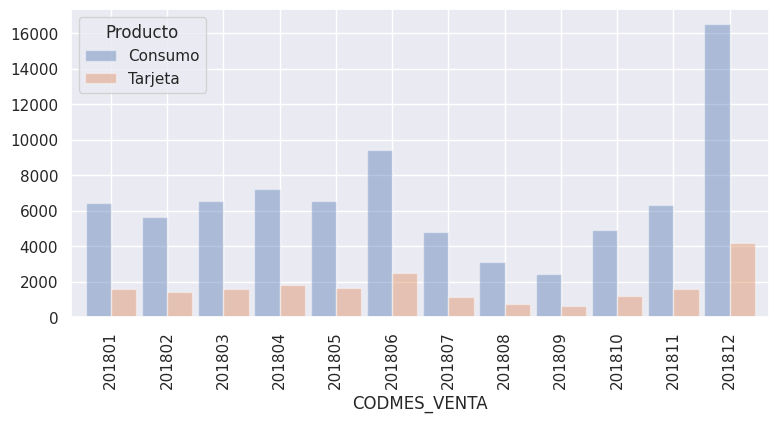

In [ ]:
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

In [ ]:
a['%_Consumo']=a['Consumo']/a['Total']
a['%_Tarjeta']=a['Tarjeta']/a['Total']
a

Producto,Consumo,Tarjeta,Total,%_Consumo,%_Tarjeta
CODMES_VENTA,,,,,
201801,6443,1621,8064,0.798983,0.201017
201802,5629,1404,7033,0.800370,0.199630
201803,6548,1612,8160,0.802451,0.197549
201804,7220,1812,9032,0.799380,0.200620
201805,6553,1642,8195,0.799634,0.200366
201806,9443,2474,11917,0.792397,0.207603
201807,4793,1156,5949,0.805682,0.194318
201808,3112,753,3865,0.805175,0.194825
201809,2458,639,3097,0.793671,0.206329


In [ ]:
b=df.pivot_table(values="idsolicitud", index="plazo", columns="Producto", aggfunc="count", margins=True, margins_name="Total", sort=True)
b

Producto,Consumo,Total
plazo,,
12.0,39932,39932
24.0,15817,15817
36.0,12069,12069
48.0,12083,12083
Total,79901,79901


In [ ]:
b1=df.pivot_table(values="idsolicitud", index="plazo", columns="Producto", aggfunc="count", sort=True)

<Axes: ylabel='Consumo'>

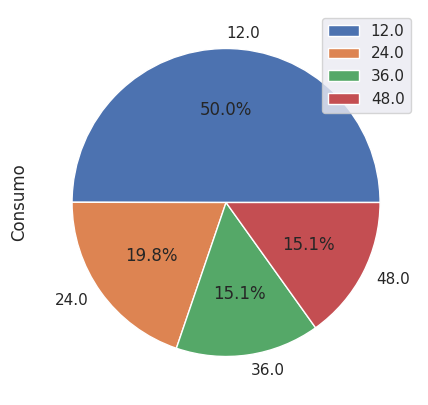

In [ ]:
b1.plot.pie(y='Consumo', figsize=(5, 5), autopct='%1.1f%%')

In [ ]:
b['%_Total']=b['Consumo']*100/b['Consumo']['Total']
b

Producto,Consumo,Total,%_Total
plazo,,,
12.0,39932,39932,49.976846
24.0,15817,15817,19.795747
36.0,12069,12069,15.104942
48.0,12083,12083,15.122464
Total,79901,79901,100.000000


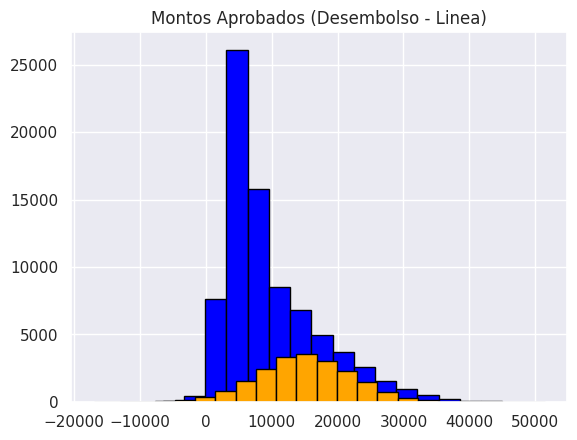

In [ ]:
%matplotlib inline
plt.title("Montos Aprobados (Desembolso - Linea)")

plt.hist(df["mtodeuda"][df["Producto"]=="Consumo"], bins=20, alpha=1, edgecolor = 'black',  linewidth=1, color="blue")
plt.hist(df["mtodeuda"][df["Producto"]=="Tarjeta"], bins=20, alpha=1, edgecolor = 'black',  linewidth=1, color="orange")
plt.show()

In [ ]:
df[ df['mtodeuda'] < 0 ]

,idsolicitud,CODMES_VENTA,Producto,plazo,mtodeuda
86,87,201811,Tarjeta,NaN,-1070.600210
166,167,201802,Tarjeta,NaN,-4061.395976
178,179,201803,Consumo,24.0,-101.629294
314,315,201801,Consumo,36.0,-234.286324
327,328,201804,Consumo,48.0,-3708.343150
...,...,...,...,...,...
99501,99502,201806,Consumo,48.0,-3489.020227
99557,99558,201806,Consumo,24.0,-486.288177
99734,99735,201804,Consumo,24.0,-3935.452025
99923,99924,201805,Consumo,48.0,-4969.743461


In [ ]:
# Separando las poblaciones
df_consumo=df[df["Producto"]=="Consumo"]
df_tarjetas=df[df["Producto"]=="Tarjeta"]

In [ ]:
df_consumo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idsolicitud,79901.0,49972.496677,28857.150775,1.00000,24989.000000,49943.000000,74955.00000,100000.00000
CODMES_VENTA,79901.0,201806.915358,3.790378,201801.00000,201804.000000,201806.000000,201811.00000,201812.00000
plazo,79901.0,23.444763,13.435667,12.00000,12.000000,24.000000,36.00000,48.00000
mtodeuda,79901.0,9779.254456,7222.194397,-13006.50505,4688.221881,7157.033911,13410.89159,51461.92042


In [ ]:
df_tarjetas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idsolicitud,20099.0,50111.823623,28909.839762,6.00000,25093.000000,50250.00000,75174.00000,99996.00000
CODMES_VENTA,20099.0,201806.927907,3.789940,201801.00000,201804.000000,201806.00000,201811.00000,201812.00000
plazo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mtodeuda,20099.0,15046.334116,6985.604093,-17019.59697,10374.665645,14957.52765,19772.36358,44479.85828
